<a href="https://colab.research.google.com/github/vkjadon/python/blob/main/03dl_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression based on Fundamental Approach


In [ ]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
  for var in dir():
    if not var.startswith("_"):
      del var
      print(f'Clearing {var}.')
except:
  pass

In [ ]:
!rm -rf utils

In [ ]:
! git clone https://github.com/vkjadon/utils/

In [ ]:
from utils.public_tests import *

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [ ]:
!ls

sample_data


In [ ]:
!pwd

/content


### Fetch Dataset from Kaggle
- Import data from Kaggle
- Use <a href="https://www.kaggle.com/muhammeddalkran/catvnoncat" target="_blank"> this Link </a>  

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

It throw error because the drive is not accessible to the colab. For this we have to mount the drive using the `Mount Drive` icon. It will ask for the permission which we have to allow so that Colab can access the Drive.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammeddalkran/catvnoncat")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/catvnoncat


In [ ]:
!ls /root/.cache/kagglehub/datasets/muhammeddalkran/catvnoncat/versions/1

catvnoncat


In [ ]:
# Loading the data (cat/non-cat) from the File downloaded from the Kaggle
train_dataset = h5py.File(f'{path}/catvnoncat/train_catvnoncat.h5', "r")

In [ ]:
methods = [attr for attr in dir(train_dataset) if not attr.startswith('_') and callable(getattr(train_dataset, attr))]
attributes = [attr for attr in dir(train_dataset) if not attr.startswith('_') and not callable(getattr(train_dataset, attr))]

print(f"Attributes :  {attributes}")
print(f"Methods : {methods}")


Attributes :  ['attrs', 'driver', 'file', 'filename', 'id', 'libver', 'meta_block_size', 'mode', 'name', 'parent', 'ref', 'regionref', 'swmr_mode', 'userblock_size']
Methods : ['build_virtual_dataset', 'clear', 'close', 'copy', 'create_dataset', 'create_dataset_like', 'create_group', 'create_virtual_dataset', 'flush', 'get', 'in_memory', 'items', 'keys', 'move', 'pop', 'popitem', 'require_dataset', 'require_group', 'setdefault', 'update', 'values', 'visit', 'visit_links', 'visititems', 'visititems_links']


In [ ]:
print(f'List containing keys only {list(train_dataset.keys())}')

List containing keys only ['list_classes', 'train_set_x', 'train_set_y']


Also, <class 'h5py._hl.dataset.Dataset'> is not the data itself, but a handle (object) pointing to the dataset inside the HDF5 file.
To actually get the values, you typically convert it into a NumPy array.

In [ ]:
a=np.array(train_dataset["list_classes"])
print(a.shape, a.dtype, a)

(2,) |S7 [b'non-cat' b'cat']


In NumPy, the `|S7` data type represents a fixed-length string of 7 characters. The S stands for string, and the number 7 indicates the length of the string. This data type is useful when you want to store and manipulate fixed-length strings in a NumPy array. Each element of the array will be a string of exactly 7 characters.

If you want to store a string of 4 characters in a NumPy array with the |S7 data type, you can do so by using a fixed-length string of length 7, where the remaining 3 characters are filled with spaces.

In [ ]:
train_set_x_orig = np.array(train_dataset["train_set_x"]) # your train set features
train_set_y = np.array(train_dataset["train_set_y"]) # your train set labels
print(type(train_set_x_orig), type(train_set_y))
print(train_set_x_orig.dtype, train_set_y.dtype)
print(train_set_y)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
uint8 int64
[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(type(train_set_x_orig))

(209, 64, 64, 3)
(209,)
<class 'numpy.ndarray'>


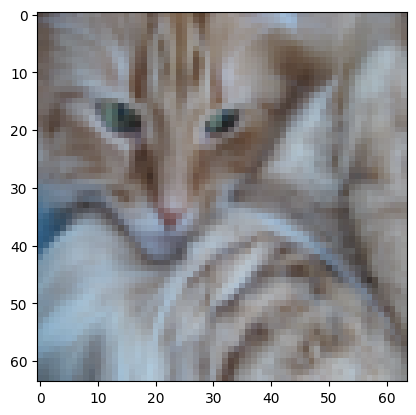

In [ ]:
index = 2
plt.imshow(train_set_x_orig[index])

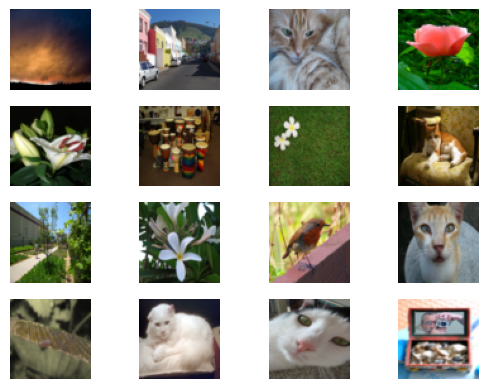

In [ ]:
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(train_set_x_orig[i])
  plt.axis('off')

In subplot function:

- First index is for rows
- Second is for columns
- Last index is for image number

In [ ]:
train_set_y.shape

(209,)

In [ ]:
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))

In [ ]:
train_set_y.shape

(1, 209)

The shape of **`X`** matrix is $\mathcal {(nx, m)}$ where each columns represents the features of each training set;

Where,   

$\mathcal {nx=px * py * 3}$ for the images as input and $m$ is the training examples.




In [ ]:
num_px = train_set_x_orig.shape[1]
num_py = train_set_x_orig.shape[2]
nx = num_px * num_py * 3
m_train = train_set_x_orig.shape[0]

print (f"Number of Features  = {nx}")
print (f"Number of training examples = {m_train}")
print (f"Size of image in pixels: {num_px} x {num_py}")
# You should get nx = 12288 and m_train = 209

Number of Features  = 12288
Number of training examples = 209
Size of image in pixels: 64 x 64


So, we have to reshape to `train_set_x_orig` to `(nx,m_train)`.

In [ ]:
train_set_x=train_set_x_orig.reshape(-1, m_train)

In [ ]:
train_set_x.shape

(12288, 209)

Optimizing the parameters is best suited on the data of the same range. Let's normalize our dataset with the maximum possible pixel value i.e. 255.

In [ ]:
X_train = train_set_x / 255.
y_train=train_set_y

In [ ]:
# Test
input_data_test(X_train, y_train, m_train, nx)

All tests passed!


In [ ]:
def initialize_with_zeros(features):
    """
    This function creates a vector of zeros of shape (features, 1) for w and initializes b to 0.

    Argument:
    features -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (features, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    w = np.zeros(features).reshape(features,1)
    b = 0.0

    return w, b

In [ ]:
#Do not change or delete
initialize_with_zeros_test(initialize_with_zeros)

All tests passed!


In [ ]:
w, b = initialize_with_zeros(nx)
# print (w, b)

In [ ]:
def forward_linear(X, w, b):
  """
    Compute the linear output z

    Arguments:
    x -- A 2D numpy array of size (nx, m)
    w -- A 2D numpy array of size (nx, 1)
    b -- A scalar

    Return:
    z -- wx + b of size (1, m)
  """
  z = np.dot(w.T, X) + b

  return z

In [ ]:
forward_linear_test(forward_linear)

All tests passed!


In [ ]:
z = forward_linear(X_train, w, b)

In [ ]:
def forward_activation(z):
    """
    Compute the activated output of z (sigmoid in this case)

    Arguments:
    z -- A 2D numpy array of any size [(1, m) in this case].

    Return:
    s -- sigmoid(z) of any size [(1, m) in this case].
    """

    s = 1/(1+np.exp(-z))

    return s

In [ ]:
forward_activation_test(forward_activation)

All tests passed!


In [ ]:
A = forward_activation(z)

In [ ]:
help(forward_activation)

Help on function forward_activation in module __main__:

forward_activation(z)
    Compute the activated output of z (sigmoid in this case)

    Arguments:
    z -- A 2D numpy array of any size [(1, m) in this case].

    Return:
    s -- sigmoid(z) of any size [(1, m) in this case].



In [ ]:
def compute_cost(A, y_train):
  """
    Compute the cost based on the Binary Cross Entropy Loss

    Arguments:
    A -- A 2D numpy array of any size [(1, m) in this case].
    y_train -- A 2D numpy array of any size [(1, m) in this case].

    Return:
    cost -- scalar of float type.
    """

  cost = np.squeeze(-np.sum((y_train*np.log(A)+(1-y_train)*np.log(1-A)),axis=1))

  return cost

In [ ]:
cost = compute_cost(A, y_train)

In [ ]:
print(f"Type {type(cost)}; Shape {cost.shape}")

Type <class 'numpy.ndarray'>; Shape ()


In [ ]:
compute_cost_test(compute_cost)

All tests passed!


In [ ]:
def compute_gradient(X, A, y):
  """
    Compute the cost based on the Binary Cross Entropy Loss

    Arguments:
    A -- A 2D numpy array of any size [(1, m) in this case].
    y_train -- A 2D numpy array of any size [(1, m) in this case].

    Return:
    cost -- scalar of float type.
  """
  m = y.shape[1]

  dw = np.dot(X,(A-y).T)/m
  db = np.sum((A-y), dtype=np.float64, axis=1)/m

  return dw, db

In [ ]:
compute_grad_test(compute_gradient)

All tests passed!


In [ ]:
learning_rate=0.002
max_iteration=5000
cost=np.zeros((max_iteration))

w, b = initialize_with_zeros(nx)

# print(w, b)

for i in range(max_iteration):

  z = forward_linear(X_train, w, b)

  A = forward_activation(z)

  #print(A, A.shape)

  cost[i] = compute_cost(A, y_train)/m_train

  dw, db = compute_gradient(X_train, A, y_train)

  #print("Gradients dw, b", dw,db)

  w=w-learning_rate*dw/m_train
  b=b-learning_rate*db/m_train

# print(w, b)


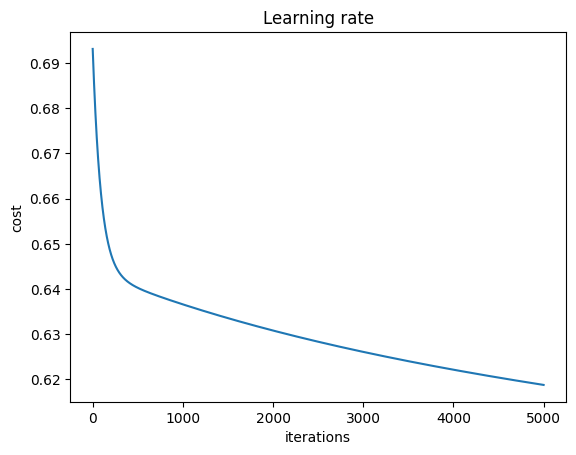

In [ ]:
# Plot learning curve (with costs)
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate")
plt.show()

## Train Accuracy

In [ ]:
A_pred = forward_activation(forward_linear(X_train, w, b))

y_pred = np.array([1 if pred > 0.5 else 0 for pred in A_pred[0]]).reshape(1, m_train)

print((np.sum(y_pred == y_train))/m_train)

0.6555023923444976


## Test Accuracy

In [ ]:
test_dataset = h5py.File(f'{path}/catvnoncat/test_catvnoncat.h5', "r")

In [ ]:
test_set_x_orig = np.array(test_dataset["test_set_x"])
test_set_y = np.array(test_dataset["test_set_y"])

In [ ]:
m_test= test_set_x_orig.shape[0]
test_set_x=test_set_x_orig.reshape(-1, m_test)

In [ ]:
X_test = test_set_x / 255.
y_test=test_set_y

In [ ]:
A_pred = forward_activation(forward_linear(X_test, w, b))

y_pred = np.array([1 if pred > 0.5 else 0 for pred in A_pred[0]]).reshape(1, m_test)

print((np.sum(y_pred == y_test))/m_test)

0.34
